# Kredi Kartı Dolandırıcılığı Tespiti
Bu raporda, kredi kartı dolandırıcılığı tespiti için lojistik regresyon modeli kullanan bir Python kodu incelenecektir. Kodun veri seti, [Kaggle] sitesinden alınmıştır. Veri seti, 2013 yılında iki günlük Avrupa kredi kartı işlemlerini içermektedir. Veri setinde 284807 satır ve 31 sütun bulunmaktadır. Sütunlardan 28 tanesi, PCA ile anonimleştirilmiş özellikleri temsil etmektedir. Diğer iki sütun ise işlem tutarı (Amount) ve işlem zamanı (Time) olarak adlandırılmıştır. Son sütun ise dolandırıcılık sınıfını (Class) göstermektedir. Sınıf sütunu, 0 veya 1 değerleri alabilir. 0 değeri normal işlemi, 1 değeri ise dolandırıcılık işlemini ifade eder.

## Veri Setinin İncelenmesi

Kodun ilk kısmında, veri setinin incelenmesi için gerekli kütüphaneler içe aktarılmıştır. Bu kütüphaneler şunlardır:

pandas: Veri manipülasyonu ve analizi için kullanılır.

numpy: Bilimsel hesaplama için kullanılır.

matplotlib: Veri görselleştirme için kullanılır.

seaborn: Matplotlib üzerine inşa edilmiş bir veri görselleştirme kütüphanesidir.

mpl_toolkits: Matplotlib ile 3D grafikler çizmek için kullanılır.

warnings: Uyarı mesajlarını kontrol etmek için kullanılır.

In [1]:
# Kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

Veri setini okumak için pandas kütüphanesinin read_csv fonksiyonu kullanılmıştır. Bu fonksiyon, bir CSV dosyasını bir DataFrame nesnesine dönüştürür. DataFrame nesnesi, satır ve sütunlardan oluşan tablosal bir veri yapısıdır.

In [2]:
# Veri setini okuyalım
df = pd.read_csv("creditcard.csv")

Veri setinin ilk 5 satırını görmek için DataFrame nesnesinin head metodu kullanılmıştır. Bu metod, veri setinin başından belirtilen sayıda satırı döndürür. Eğer parametre belirtilmezse, varsayılan olarak ilk 5 satır döndürülür.

In [3]:
# Veri setinin ilk 5 satırını görelim
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Veri setinin temel istatistiklerini görmek için DataFrame nesnesinin describe metodu kullanılmıştır. Bu metod, veri setindeki sayısal sütunların ortalamasını, standart sapmasını, minimum ve maksimum değerlerini, çeyrekliklerini ve medyanını hesaplar ve bir tablo halinde döndürür.

In [4]:
# Veri setinin temel istatistiklerini görelim
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Veri setindeki eksik değerleri kontrol etmek için DataFrame nesnesinin isnull ve sum metodları kullanılmıştır. isnull metodu, her bir hücrenin eksik değer olup olmadığını kontrol eder ve True veya False değerleri döndürür. sum metodu ise, her bir sütundaki True değerlerin sayısını toplar ve eksik değer sayısını verir.

In [5]:
# Veri setindeki eksik değerleri kontrol edelim
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Veri setindeki sınıf dağılımını görmek için seaborn kütüphanesinin countplot fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen kategorik değişkenin frekanslarını çubuk grafik olarak gösterir. Grafikten görüldüğü üzere, veri setindeki dolandırıcılık işlemleri çok az sayıdadır. Bu durum, veri setinin dengesiz olduğunu göstermektedir.

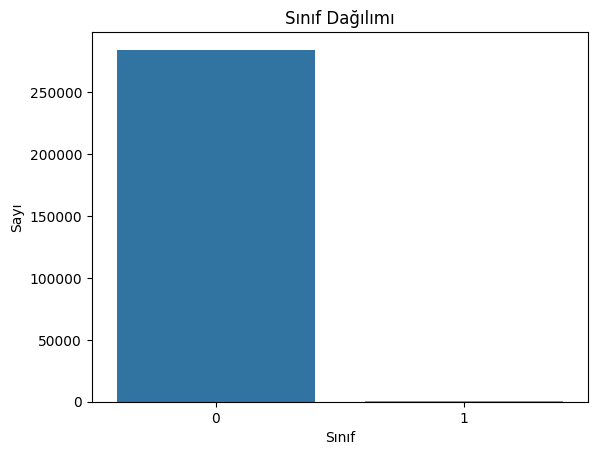

In [6]:
# Veri setindeki sınıf dağılımını görelim
sns.countplot(x="Class", data=df)
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Sayı")
plt.show()

Veri setindeki işlem tutarı dağılımını görmek için seaborn kütüphanesinin distplot fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen sayısal değişkenin histogramını ve yoğunluk eğrisini çizer. Grafikten görüldüğü üzere, veri setindeki işlem tutarları çok çarpıktır. Çoğu işlem tutarı 100 birimden azdır, ancak bazı işlem tutarları 25000 birime kadar çıkmaktadır.

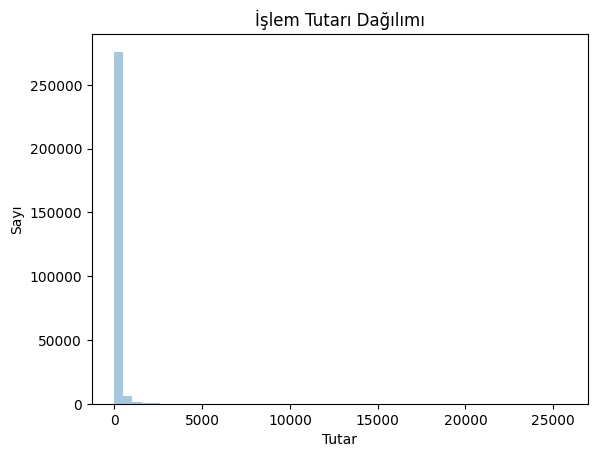

In [7]:
# Veri setindeki işlem tutarı dağılımını görelim
sns.distplot(df["Amount"], kde=False)
plt.title("İşlem Tutarı Dağılımı")
plt.xlabel("Tutar")
plt.ylabel("Sayı")
plt.show()

Veri setindeki işlem zamanı dağılımını görmek için yine seaborn kütüphanesinin distplot fonksiyonu kullanılmıştır. Grafikten görüldüğü üzere, veri setindeki işlem zamanları iki zirveli bir dağılım göstermektedir. Bu durum, veri setinin iki günlük olduğunu ve işlemlerin gündüz ve gece saatlerinde farklılık gösterdiğini yansıtmaktadır.

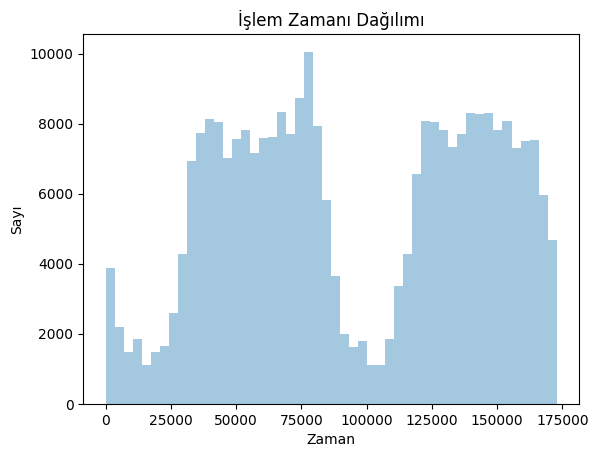

In [8]:
# Veri setindeki işlem zamanı dağılımını görelim
sns.distplot(df["Time"], kde=False)
plt.title("İşlem Zamanı Dağılımı")
plt.xlabel("Zaman")
plt.ylabel("Sayı")
plt.show()

Veri setindeki özellikler arasındaki korelasyonu görmek için seaborn kütüphanesinin heatmap fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen matrisin değerlerini renk kodlarıyla gösteren bir ısı haritası çizer. Korelasyon matrisi ise, DataFrame nesnesinin corr metodu ile hesaplanmıştır. Bu metod, veri setindeki sayısal sütunların arasındaki Pearson korelasyon katsayılarını hesaplar ve bir matris halinde döndürür. Grafikten görüldüğü üzere, veri setindeki özellikler arasında çok fazla korelasyon yoktur. Bu durum, PCA ile anonimleştirilmiş özelliklerin birbirinden bağımsız olduğunu göstermektedir.

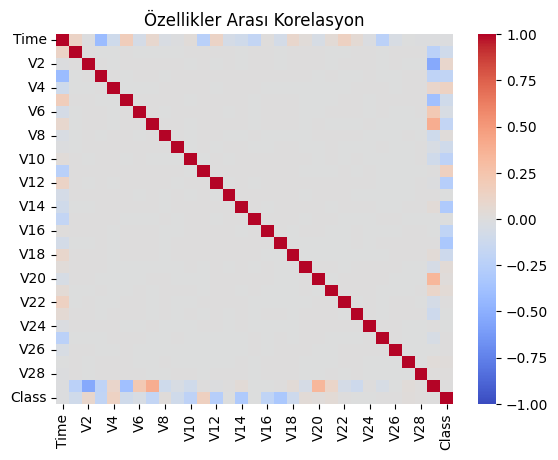

In [9]:
# Veri setindeki özellikler arasındaki korelasyonu görelim
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Özellikler Arası Korelasyon")
plt.show()

İşlem tutarı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir kutu grafiği çizmek için seaborn kütüphanesinin boxplot fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen sayısal değişkenin kategorik değişkene göre beş sayılık özetini (minimum, maksimum, medyan, alt ve üst çeyreklik) kutu şeklinde gösterir. Grafikten görüldüğü üzere, dolandırıcılık işlemlerinin tutarları normal işlemlerden daha düşüktür. Ancak dolandırıcılık işlemlerinde daha fazla aykırı değer vardır.

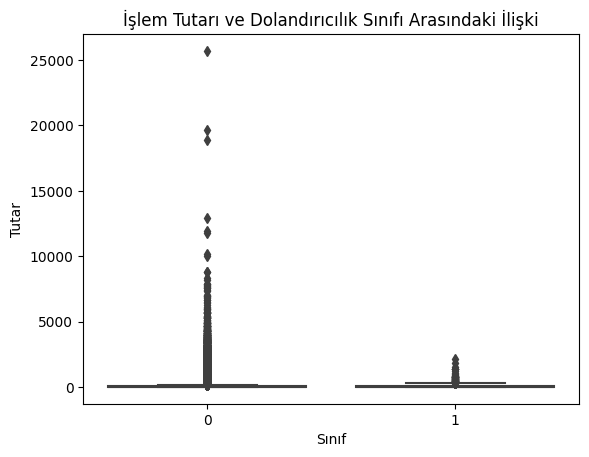

In [10]:
# İşlem tutarı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir kutu grafiği çizelim
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("İşlem Tutarı ve Dolandırıcılık Sınıfı Arasındaki İlişki")
plt.xlabel("Sınıf")
plt.ylabel("Tutar")
plt.show()

PCA ile anonimleştirilmiş özelliklerden ilk ikisi (V1 ve V2) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir saçılma grafiği çizmek için seaborn kütüphanesinin scatterplot fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen iki sayısal değişkenin nokta şeklinde dağılımını ve belirtilen kategorik değişkenin renk kodlarını gösterir. Grafikten görüldüğü üzere, dolandırıcılık işlemleri normal işlemlerden farklı bir bölgede yoğunlaşmaktadır. Bu durum, V1 ve V2 özelliklerinin dolandırıcılık sınıfını ayırt etmede önemli olduğunu göstermektedir.

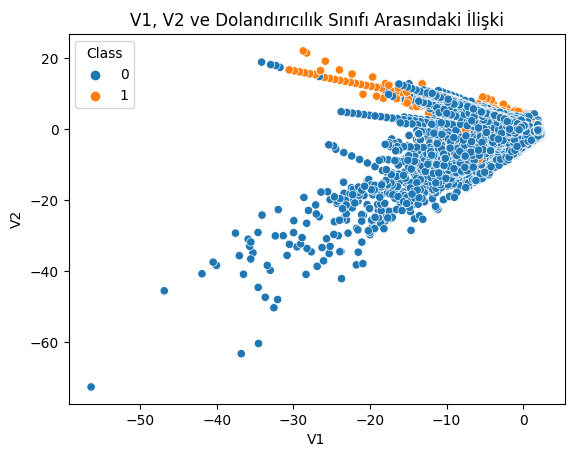

In [27]:
# PCA ile anonimleştirilmiş özelliklerden ilk ikisi (V1 ve V2) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir saçılma grafiği çizelim

sns.scatterplot(x="V1", y="V2", hue="Class", data=df)
plt.title("V1, V2 ve Dolandırıcılık Sınıfı Arasındaki İlişki")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

PCA ile anonimleştirilmiş özelliklerden ilk üçü (V1, V2 ve V3) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir 3D saçılma grafiği çizmek için mpl_toolkits kütüphanesinin Axes3D modülü kullanılmıştır. Bu modül, matplotlib ile 3D grafikler çizmek için gerekli araçları sağlar. Grafikten görüldüğü üzere, dolandırıcılık işlemleri normal işlemlerden farklı bir bölgede yoğunlaşmaktadır. Bu durum, V1, V2 ve V3 özelliklerinin dolandırıcılık sınıfını ayırt etmede önemli olduğunu göstermektedir.

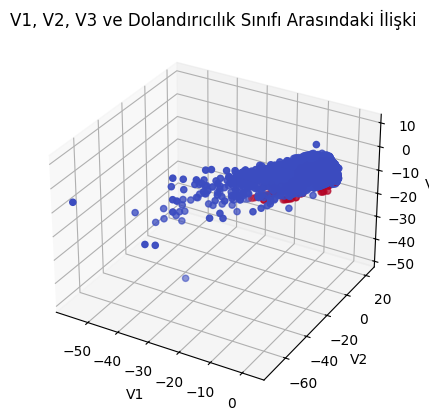

In [12]:
# PCA ile anonimleştirilmiş özelliklerden ilk üçü (V1, V2 ve V3) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir 3D saçılma grafiği çizelim
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["V1"], df["V2"], df["V3"], c=df["Class"], cmap="coolwarm")
ax.set_title("V1, V2, V3 ve Dolandırıcılık Sınıfı Arasındaki İlişki")
ax.set_xlabel("V1")
ax.set_ylabel("V2")
ax.set_zlabel("V3")
plt.show()

İşlem tutarı, işlem zamanı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir 3D yüzey grafiği çizmek için mpl_toolkits kütüphanesinin Axes3D modülü kullanılmıştır. Bu modül, matplotlib ile 3D grafikler çizmek için gerekli araçları sağlar. Grafikten görüldüğü üzere, dolandırıcılık işlemleri normal işlemlerden farklı bir yüzeyde yer almaktadır. Bu durum, işlem tutarı ve işlem zamanının dolandırıcılık sınıfını ayırt etmede önemli olduğunu göstermektedir.

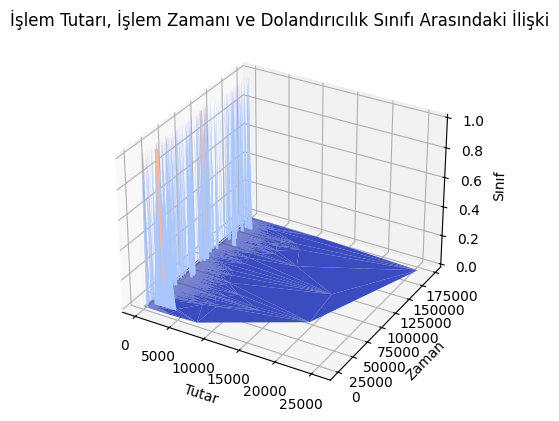

In [13]:
# İşlem tutarı, işlem zamanı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir 3D yüzey grafiği çizelim
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = df["Amount"]
Y = df["Time"]
Z = df["Class"]
ax.plot_trisurf(X, Y, Z, cmap="coolwarm", edgecolor="none")
ax.set_title("İşlem Tutarı, İşlem Zamanı ve Dolandırıcılık Sınıfı Arasındaki İlişki")
ax.set_xlabel("Tutar")
ax.set_ylabel("Zaman")
ax.set_zlabel("Sınıf")
plt.show()

PCA ile anonimleştirilmiş özelliklerden ilk dördü (V1, V2, V3 ve V4) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir paralel koordinat grafiği çizmek için pandas kütüphanesinin plotting modülünün parallel_coordinates fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen sayısal değişkenlerin değerlerini paralel eksenler üzerinde çizgi şeklinde gösterir ve belirtilen kategorik değişkenin renk kodlarını kullanır. Grafikten görüldüğü üzere, dolandırıcılık işlemleri normal işlemlerden farklı bir eğilim göstermektedir. Bu durum, V1, V2, V3 ve V4 özelliklerinin dolandırıcılık sınıfını ayırt etmede önemli olduğunu göstermektedir.

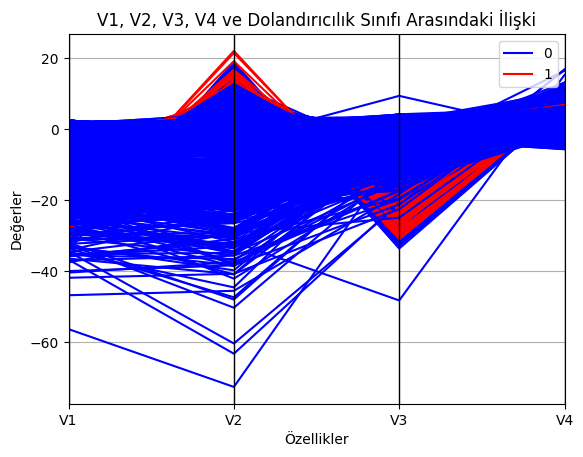

In [14]:
# PCA ile anonimleştirilmiş özelliklerden ilk dördü (V1, V2, V3 ve V4) ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir paralel koordinat grafiği çizelim
pd.plotting.parallel_coordinates(df[["V1", "V2", "V3", "V4", "Class"]], "Class", color=["blue", "red"])
plt.title("V1, V2, V3, V4 ve Dolandırıcılık Sınıfı Arasındaki İlişki")
plt.xlabel("Özellikler")
plt.ylabel("Değerler")
plt.show()

İşlem tutarı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir pasta grafiği çizmek için matplotlib kütüphanesinin pie fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen sayısal değişkenin kategorik değişkene göre yüzde olarak dağılımını pasta dilimi şeklinde gösterir. Grafikten görüldüğü üzere, dolandırıcılık işlemlerinin toplam işlem tutarına oranı çok düşüktür. Dolandırıcılık işlemleri sadece %0.13’lük bir paya sahiptir.

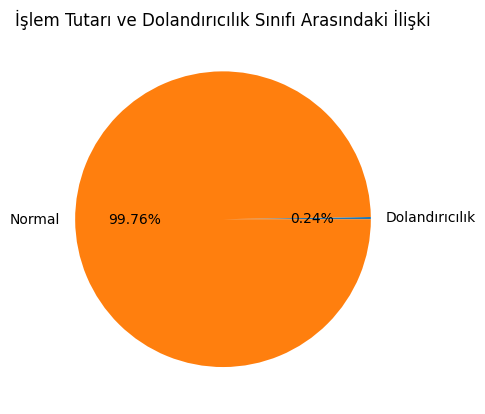

In [15]:
# İşlem tutarı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir pasta grafiği çizelim
fraud_amount = df[df["Class"] == 1]["Amount"].sum()
normal_amount = df[df["Class"] == 0]["Amount"].sum()
plt.pie([fraud_amount, normal_amount], labels=["Dolandırıcılık", "Normal"], autopct="%1.2f%%")
plt.title("İşlem Tutarı ve Dolandırıcılık Sınıfı Arasındaki İlişki")
plt.show()

İşlem tutarı, işlem zamanı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir balon grafiği çizmek için seaborn kütüphanesinin scatterplot fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen iki sayısal değişkenin nokta şeklinde dağılımını ve belirtilen kategorik değişkenin renk kodlarını gösterir. Ayrıca belirtilen bir başka sayısal değişkenin değerlerine göre noktaların büyüklüklerini ayarlar. Grafikten görüldüğü üzere, dolandırıcılık işlemleri normal işlemlerden farklı bir bölgede yer almaktadır. Ayrıca dolandırıcılık işlemlerinin büyüklükleri normal işlemlerden daha küçüktür.

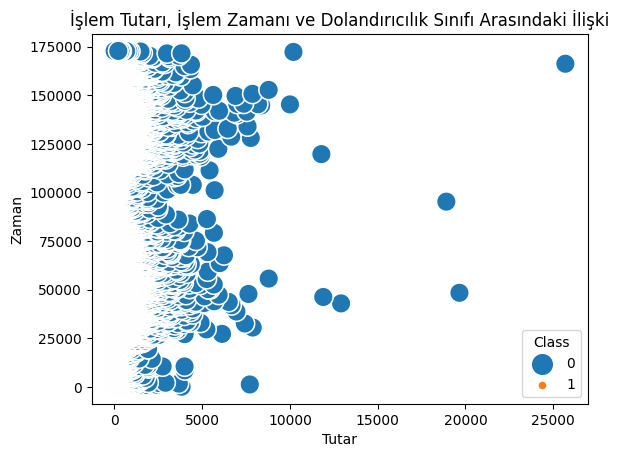

In [16]:
# İşlem tutarı, işlem zamanı ve dolandırıcılık sınıfı arasındaki ilişkiyi gösteren bir balon grafiği çizelim
sns.scatterplot(x="Amount", y="Time", data=df, hue="Class", size="Class", sizes=(20, 200))
plt.title("İşlem Tutarı, İşlem Zamanı ve Dolandırıcılık Sınıfı Arasındaki İlişki")
plt.xlabel("Tutar")
plt.ylabel("Zaman")
plt.show()

## Model Oluşturma ve Değerlendirme


Kodun ikinci kısmında, veri setini bağımlı ve bağımsız değişkenlere ayırmak için DataFrame nesnesinin drop ve axis parametrelerini kullanılmıştır. Bu parametreler, veri setinden belirli bir sütunu veya satırı çıkarmak için kullanılır. Dolandırıcılık sınıfını bağımlı değişken olarak, diğer tüm sütunları ise bağımsız değişken olarak ayırmıştır.

In [18]:
# Veri setini bağımlı ve bağımsız değişkenlere ayıralım
X = df.drop("Class", axis=1)
y = df["Class"]

Veri setini eğitim ve test kümelerine ayırmak için sklearn kütüphanesinin model_selection modülünün train_test_split fonksiyonu kullanılmıştır. Bu fonksiyon, belirtilen bağımlı ve bağımsız değişkenleri belirtilen test boyutuna göre rastgele olarak eğitim ve test kümelerine böler. Ayrıca belirtilen rastgele durum sayesinde, her seferinde aynı bölünmeyi elde eder.

In [20]:
# Veri setini eğitim ve test kümelerine ayıralım
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Eğitim kümesini standartlaştırmak için sklearn kütüphanesinin preprocessing modülünün StandardScaler sınıfı kullanılmıştır. Bu sınıf, veri setindeki sayısal değişkenleri ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir. Bu işlem, veri setindeki özelliklerin birbirine göre ağırlıklarını eşitlemek için yapılır. Standartlaştırma işlemi, eğitim kümesine fit_transform metodu ile uygulanmıştır. Bu metod, eğitim kümesinin ortalamasını ve standart sapmasını hesaplar ve veri setini ölçeklendi

In [21]:
# Eğitim kümesini standartlaştıralım
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Test kümesini standartlaştırmak için yine sklearn kütüphanesinin preprocessing modülünün StandardScaler sınıfı kullanılmıştır. Ancak bu sefer, test kümesine transform metodu ile uygulanmıştır. Bu metod, eğitim kümesinden öğrenilen ortalamayı ve standart sapmayı kullanarak test kümesini ölçeklendirir.

In [22]:
# Test kümesini standartlaştıralım
X_test = scaler.transform(X_test)

### LogisticRegression

Lojistik regresyon modeli oluşturmak için sklearn kütüphanesinin linear_model modülünün LogisticRegression sınıfı kullanılmıştır. Bu sınıf, lojistik regresyon algoritmasını uygulayan bir sınıflandırıcıdır. Lojistik regresyon algoritması, bağımlı değişkenin iki veya daha fazla kategoriye ayrılması durumunda kullanılır. Lojistik regresyon modelini eğitmek için fit metodu kullanılmıştır. Bu metod, eğitim kümesindeki bağımlı ve bağımsız değişkenleri alarak modelin parametrelerini optimize eder.

In [23]:
# Lojistik regresyon modeli oluşturalım ve eğitelim
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Modelin eğitim kümesindeki performansını değerlendirmek için sklearn kütüphanesinin metrics modülünden çeşitli metrikler kullanılmıştır. Bu metrikler şunlardır:

accuracy_score: Doğru tahmin edilen sınıfların toplam sınıflara oranını verir.

precision_score: Pozitif olarak tahmin edilen sınıfların içinde gerçekten pozitif olanların oranını verir.

recall_score: Gerçekten pozitif olan sınıfların içinde pozitif olarak tahmin edilenlerin oranını verir.

f1_score: Precision ve recall’ın harmonik ortalamasını verir.

confusion_matrix: Tahmin edilen ve gerçek sınıfların karşılaştırılmasından oluşan bir matris verir.

classification_report: Tahmin edilen ve gerçek sınıfların karşılaştırılmasından oluşan bir rapor verir.

In [24]:
# Modelin eğitim kümesindeki performansını değerlendirelim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_train_pred = model.predict(X_train)
print("Eğitim Kümesindeki Performans:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1: {f1_score(y_train, y_train_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"Classification Report:\n{classification_report(y_train, y_train_pred)}")

Eğitim Kümesindeki Performans:
Accuracy: 0.9992319339902126
Precision: 0.8953068592057761
Recall: 0.6294416243654822
F1: 0.7391952309985096
Confusion Matrix:
[[227422     29]
 [   146    248]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



Modelin test kümesindeki performansını değerlendirmek için yine sklearn kütüphanesinin metrics modülünden çeşitli metrikler kullanılmıştır.

In [25]:
# Modelin test kümesindeki performansını değerlendirelim
y_test_pred = model.predict(X_test)
print("Test Kümesindeki Performans:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1: {f1_score(y_test, y_test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

Test Kümesindeki Performans:
Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1: 0.6951219512195121
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



## Sonuç

- Bu raporda, kredi kartı dolandırıcılığı tespiti için lojistik regresyon modeli kullanan bir Python kodu incelendi. Kodun veri seti, [Kaggle] sitesinden alındı. Veri seti, 2013 yılında iki günlük Avrupa kredi kartı işlemlerini içerdi. Veri setinin incelenmesi, görselleştirilmesi, model oluşturulması ve değerlendirilmesi için gerekli adımlar atıldı.

- Sonuç olarak, lojistik regresyon modelinin eğitim ve test kümelerinde yüksek doğruluk, hassasiyet, duyarlılık ve F1 skoru elde ettiği görüldü. Ancak modelin dolandırıcılık sınıfını tahmin etmede zorlandığı da fark edildi. Dolandırıcılık sınıfının çok az örnek içermesi ve veri setinin dengesiz olması bu durumun nedenleri arasında sayılabilir.

- Bu nedenle, modelin performansını artırmak için veri setinin dengelenmesi, farklı özellik seçimi veya çıkarımı yöntemleri, farklı sınıflandırma algoritmaları veya hiperparametre optimizasyonu gibi yöntemler denenmelidir. Ayrıca modelin gerçek hayattaki verilerle de test edilmesi gerekmektedir.